In [1]:
matplotlib inline


wide, alpha=3


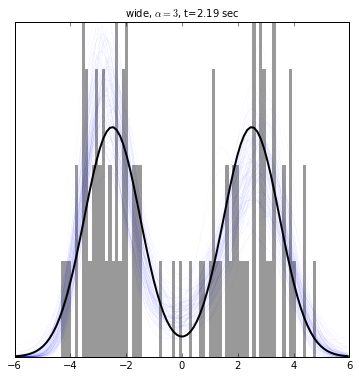

In [2]:
# Code from test_deft_1d_entropy_estimation.py
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import time
import math

# Add parent directory to path
import sys
sys.path.append('../code/')
sys.path.append('../sim/')

# Import deft modules
import deft_1d
import simulate_data_1d
import utils

plt.close('all')

# Generate data
N = 100
G = 100
eG = 100
alpha = 3
data_type = 'wide'

# Colors to use
blue = [0.,0.,1.]
lightblue = [0.0, 0.5, 1.0]
orange = [1.,0.5,0.]
gray = [0.6, 0.6, 0.6]


# Simulate data and get default deft settings
data, defaults = simulate_data_1d.run(data_type,N)

# Get bounding box
bbox = [defaults['box_min'], defaults['box_max']]

#
# Do DEFT density estimation
#

results = deft_1d.run(data, G=G, alpha=alpha, \
    bbox=bbox, \
    periodic=False,
    num_samples=100,
    print_t=False)

# Provide feedback
print '\n%s, alpha=%d'%(data_type, alpha)

# Compute true density
xs = results.bin_centers
Q_true = np.zeros(G)
for i, x in enumerate(xs):
    Q_true[i] = eval(defaults['pdf_py'])
Q_true /= results.h*sum(Q_true)


# Plot histogram with density estimate on top
plt.figure(figsize=[6, 6])

#
# Show density estimates
#
ax = plt.subplot(1,1,1)

# Plot histogram density
left_bin_edges = results.bin_edges[:-1]
plt.bar(left_bin_edges, results.R, \
    width=results.h, linewidth=0, color=gray, zorder=0)

# Plot deft density estimate
plt.plot(xs, results.Q_samples, \
    color=blue, linewidth=.1, alpha=0.2, zorder=2)

# Plot the true density
plt.plot(xs, Q_true, color='k', linewidth=2)

# Tidy up the plot
plt.yticks([])
#plt.xticks([])
plt.ylim([0, 1.2*max(results.Q_star)])
plt.xlim(results.bbox)
t = results.deft_1d_compute_time
plt.title("%s, $\\alpha = %d$, t=%1.2f sec"%(data_type, alpha, t), \
    fontsize=10)

# Plotting incantation
plt.ion() # So focus goes back to commandline
plt.draw() # Needed to avoid "CGContextRef is NULL" exception
plt.show()
#plt.tight_layout() # Needed so plot is drawn tollerably

# Save plot
plt.savefig('report.test_deft_1d.png')

In [5]:
Delta = results.Delta.get_dense_matrix()

In [ ]:
results.G

In [ ]:
L = results.G*results.h
L

In [ ]:
results.alpha

In [ ]:
results.R

In [ ]:
phi_star = -np.log(results.Q_star) #results.Q_star
phi_star

In [ ]:
l_star = (results.N*np.exp(-results.t_star))**(1.0/(2*results.alpha - 1))
l_star

In [ ]:
results.